В этом ноутбуке вы обучите нейронную сеть для классификации рукописных цифр.

Необходимые импорты библиотек:

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

Скачивание данных 

In [8]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

In [ ]:
x_test.shape

Яркости пикселей от 0 до 255, приведем все значения к интервалу [0, 1]

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Данные:

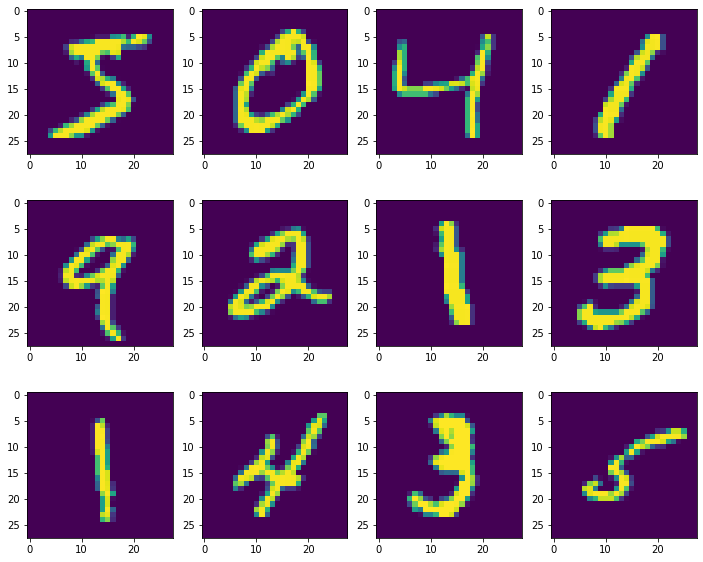

In [10]:
plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow((x_train[i]))

Определим нейронную сеть с двумя слоями:

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Зададим параметры обучения модели

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Посмотрим, какие предсказания делает модель:

In [ ]:
predictions = np.argmax(model(x_train[:12]).numpy(), axis=-1)

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3,4,i+1) 
    plt.xlabel('Prediction is {}, true label is {}'.format(predictions[i], y_train[i]))
    plt.imshow((x_train[i]))

Запустим обучение модели:

In [ ]:
model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test,  y_test, verbose=2)

Снова посмотрим на предсказания:

In [ ]:
predictions = np.argmax(model(x_test[:12]).numpy(), axis=-1)


plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3,4,i+1) 
    plt.xlabel('Prediction is {}, true label is {}'.format(predictions[i], y_test[i]))
    plt.imshow((x_test[i]))